<a href="https://colab.research.google.com/github/minamky/datasci112-college-acceptance-rate-predictor/blob/main/2_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [17]:
import pandas as pd

In [18]:
df_merged = pd.read_csv("/content/df_merged.csv")
df_complete = pd.read_csv("/content/df_complete")
df_flagship_combined = pd.read_csv("/content/df_flagship_combined (3)")
df_merged

,Name,Primarily Undergraduate,Public: Net Cost,Private: Net Cost,In State Tuition,Out of State Tution,Completion Rate,Admission Rate,City,State,...,id,Latitude,Longitude,Net Cost,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 75th percentile score,SAT Math 75th percentile score,SAT Writing 75th percentile score,ACT Composite 75th percentile score
0,Alabama A & M University,3,17694.0,0.0,10024.0,18634.0,0.2866,0.8965,Normal,AL,...,100654,34.783368,-86.568502,17694.0,15.0,88.0,450.0,450.0,NaN,19.0
1,University of Alabama at Birmingham,3,17857.0,0.0,8568.0,20400.0,0.6117,0.8060,Birmingham,AL,...,100663,33.505697,-86.799345,17857.0,6.0,93.0,640.0,650.0,NaN,28.0
2,University of Alabama in Huntsville,3,17054.0,0.0,11338.0,23734.0,0.5714,0.7711,Huntsville,AL,...,100706,34.724557,-86.640449,17054.0,34.0,94.0,640.0,650.0,NaN,29.0
3,Alabama State University,3,19853.0,0.0,11068.0,19396.0,0.3177,0.9888,Montgomery,AL,...,100724,32.364317,-86.295677,19853.0,18.0,87.0,480.0,480.0,NaN,19.0
4,The University of Alabama,3,21649.0,0.0,11620.0,31090.0,0.7214,0.8039,Tuscaloosa,AL,...,100751,33.211875,-87.545978,21649.0,23.0,76.0,620.0,640.0,600.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,Arizona College of Nursing-Fort Lauderdale,3,0.0,0.0,20090.0,20090.0,NaN,1.0000,Fort Lauderdale,FL,...,495439,26.205783,-80.138479,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1675,Arizona College of Nursing-Tucson,3,0.0,0.0,20170.0,20170.0,NaN,1.0000,Tucson,AZ,...,495448,32.217803,-110.875881,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1676,Arizona College of Nursing-Phoenix,3,0.0,0.0,20170.0,20170.0,NaN,0.9091,Phoenix,AZ,...,495457,33.635804,-112.117327,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1677,The Pennsylvania State University,3,26010.0,0.0,18450.0,35514.0,0.7281,0.7827,University Park,PA,...,495767,40.796500,-77.862848,26010.0,NaN,NaN,NaN,NaN,NaN,NaN


# Finding Correlation between SAT Math 75th percentile score and Admission Rate

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
import plotly.express as px

I abbreviated each Accreditor, so it is easier to read on a later graph.

In [20]:
df_merged["Accreditor Abbrev"] = df_merged["Accreditor"].map({
    "Southern Association of Colleges and Schools Commission on Colleges" : "SACSCC",
    "National Accrediting Commission of Career Arts and Sciences": "NACCAS",
    "Higher Learning Commission": "HLC",
    "Association for Bibical Higher Educaiton": "ABHE",
    "Middle States Commission on Higher Education": "MSCHE",
    "New England Commission on Higher Education": "NECHE",
    "Western Association of Schools and Colleges Senior Colleges and University Commission": "WASCSCUC",
    "Northwest Commission on Colleges and Universities": "NCCU",
    "Association of Advanced Rabbinical and Talmudic Schools": "AARTS",
    "Transnational Association of Christian Colleges and Schools": "TACCS",
    "Accrediting Commission of Career Schools and Colleges": "ACCSC",
    "Association of Institutions of Jewish Studies": "AIJS",
    "Accrediting Bureau of Health Education Schools": "ABHES",
    "National Association of Schools of Music": "NASM"
})
df_merged

,Name,Primarily Undergraduate,Public: Net Cost,Private: Net Cost,In State Tuition,Out of State Tution,Completion Rate,Admission Rate,City,State,...,Latitude,Longitude,Net Cost,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 75th percentile score,SAT Math 75th percentile score,SAT Writing 75th percentile score,ACT Composite 75th percentile score,Accreditor Abbrev
0,Alabama A & M University,3,17694.0,0.0,10024.0,18634.0,0.2866,0.8965,Normal,AL,...,34.783368,-86.568502,17694.0,15.0,88.0,450.0,450.0,NaN,19.0,SACSCC
1,University of Alabama at Birmingham,3,17857.0,0.0,8568.0,20400.0,0.6117,0.8060,Birmingham,AL,...,33.505697,-86.799345,17857.0,6.0,93.0,640.0,650.0,NaN,28.0,SACSCC
2,University of Alabama in Huntsville,3,17054.0,0.0,11338.0,23734.0,0.5714,0.7711,Huntsville,AL,...,34.724557,-86.640449,17054.0,34.0,94.0,640.0,650.0,NaN,29.0,SACSCC
3,Alabama State University,3,19853.0,0.0,11068.0,19396.0,0.3177,0.9888,Montgomery,AL,...,32.364317,-86.295677,19853.0,18.0,87.0,480.0,480.0,NaN,19.0,SACSCC
4,The University of Alabama,3,21649.0,0.0,11620.0,31090.0,0.7214,0.8039,Tuscaloosa,AL,...,33.211875,-87.545978,21649.0,23.0,76.0,620.0,640.0,600.0,30.0,SACSCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,Arizona College of Nursing-Fort Lauderdale,3,0.0,0.0,20090.0,20090.0,NaN,1.0000,Fort Lauderdale,FL,...,26.205783,-80.138479,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ABHES
1675,Arizona College of Nursing-Tucson,3,0.0,0.0,20170.0,20170.0,NaN,1.0000,Tucson,AZ,...,32.217803,-110.875881,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ABHES
1676,Arizona College of Nursing-Phoenix,3,0.0,0.0,20170.0,20170.0,NaN,0.9091,Phoenix,AZ,...,33.635804,-112.117327,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ABHES
1677,The Pennsylvania State University,3,26010.0,0.0,18450.0,35514.0,0.7281,0.7827,University Park,PA,...,40.796500,-77.862848,26010.0,NaN,NaN,NaN,NaN,NaN,NaN,MSCHE


I renamed the columns to be shorter, so it is easier to read on the graph

In [21]:
X_train = df_merged[["SAT Math 75th percentile score", "Admission Rate", "Accreditor Abbrev"]].dropna()
X_train.columns = ['SAT Math','Admission Rate', 'Accreditor']
X_train

,SAT Math,Admission Rate,Accreditor
0,450.0,0.8965,SACSCC
1,650.0,0.8060,SACSCC
2,650.0,0.7711,SACSCC
3,480.0,0.9888,SACSCC
4,640.0,0.8039,SACSCC
...,...,...,...
1540,550.0,0.7749,SACSCC
1550,530.0,0.7943,WASCSCUC
1559,590.0,0.9179,SACSCC
1642,580.0,0.8311,SACSCC


In [22]:
px.scatter(X_train, x="SAT Math", y="Admission Rate", trendline="ols")

In [23]:
X_train2 = df_merged[["SAT Critical Reading 75th percentile score", "Admission Rate", "Accreditor Abbrev"]].dropna()
px.scatter(X_train2, x="SAT Critical Reading 75th percentile score", y="Admission Rate", trendline="ols")

In [24]:
df_merged[["SAT Math 75th percentile score", "Admission Rate"]].corr()

,SAT Math 75th percentile score,Admission Rate
SAT Math 75th percentile score,1.000000,-0.499779
Admission Rate,-0.499779,1.000000


In [25]:
df_merged[["SAT Critical Reading 75th percentile score", "Admission Rate"]].corr()

,SAT Critical Reading 75th percentile score,Admission Rate
SAT Critical Reading 75th percentile score,1.000000,-0.484183
Admission Rate,-0.484183,1.000000


There is a -0.499 correlation between SAT Math 75th percentile score and admission rate which is a moderately strong negative correlation. On the scatter plot, we can see an overall negative corrleation between SAT MATH 75th percentile score and admission rate.

There is a -0.484 correlation between SAT Critical Reading 75th percentile score and admission rate which is also a moderately strong negative correlation. On the scatter plot, we can see an overall negative corrleation between SAT Critical Reading 75th percentile score and admission rate.

This makes sense because schools that are more competitive to get into will usually only take students with higher test scores.

# Correlation between SAT Math 75th Percentile Score and Admission Rate Split between Different Accreditors

In [26]:
#Split between Accreditors and put in Trendlines
px.scatter(X_train, x="SAT Math", y="Admission Rate", facet_col = "Accreditor", trendline="ols", color = "Accreditor", trendline_color_override= "black")


In [27]:
df_merged.groupby("Accreditor")[["SAT Math 75th percentile score", "Admission Rate"]].corr()

SAT Math 75th percentile score  \
Accreditor                                                                                                          
Accrediting Bureau of Health Education Schools     SAT Math 75th percentile score                             NaN   
                                                   Admission Rate                                             NaN   
Accrediting Commission of Career Schools and Co... SAT Math 75th percentile score                             NaN   
                                                   Admission Rate                                             NaN   
Accrediting Council for Independent Colleges an... SAT Math 75th percentile score                             NaN   
                                                   Admission Rate                                             NaN   
Association for Bibical Higher Educaiton           SAT Math 75th percentile score                             NaN   
                                                   Admission Rate                                             NaN   
Association of Advanced Rabbinical and Talmudic... SAT Math 75th percentile score                             NaN   
                                                   Admission Rate                                             NaN   
Association of Institutions of Jewish Studies      SAT Math 75th percentile score                             NaN   
                                                   Admission Rate                                             NaN   
Council on Occupational Education                  SAT Math 75th percentile score                             NaN   
                                                   Admission Rate                                             NaN   
Distance Education Accrediting Commission          SAT Math 75th percentile score                             NaN   
                                                   Admission Rate                                             NaN   
EXEMPT                                             SAT Math 75th percentile score                             NaN   
                                                   Admission Rate                                             NaN   
Higher Learning Commission                         SAT Math 75th percentile score                        1.000000   
                                                   Admission Rate                                       -0.299147   
Middle States Commission on Higher Education       SAT Math 75th percentile score                        1.000000   
                                                   Admission Rate                                       -0.688022   
Midwifery Education Accreditation Council          SAT Math 75th percentile score                             NaN   
                                                   Admission Rate                                             NaN   
National Association of Schools of Arts and Design SAT Math 75th percentile score                             NaN   
                                                   Admission Rate                                             NaN   
National Association of Schools of Music           SAT Math 75th percentile score                             NaN   
                                                   Admission Rate                                             NaN   
New England Commission on Higher Education         SAT Math 75th percentile score                        1.000000   
                                                   Admission Rate                                       -0.870765   
Northwest Commission on Colleges and Universities  SAT Math 75th percentile score                        1.000000   
                                                   Admission Rate                                       -0.504349   
Southern Association of Colleges and Schools Co... SAT Math 75th percentile score                        

If we split up the plot into different accrediation which is often associated with different regions, we can see that the corrlelation varies even though every graph shows an overall negative correlation. The strongest correlation between SAT Math and Admission Rate is schools that are accredited by the New England Commission on Higher Education while the weakest correlation is from the Southern Association of Colleges and Schools Commission on Colleges.

# Dot Map of College Locations; Colored Based on Admission Rate

In [28]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


I used the STATE FIP codes from df_merged and merged it with the State shapefile which also contains State FIP Codes. However, I needed to strip the extra 0 from the shape file so the State FIP Codes would match.

In [29]:
import geopandas as gpd

gdf_states = gpd.read_file("/content/cb_2018_us_state_20m.zip")
gdf_states["STATEFP"] = (gdf_states["STATEFP"].str.lstrip("0")).astype(int)
gdf_states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."
5,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05314 41.11446, -104.05245 41.2..."
6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704..."
7,72,01779808,0400000US72,72,PR,Puerto Rico,00,8868896030,4922382562,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ..."
8,1,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
9,5,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."


In [30]:
gdf_colleges = gpd.GeoDataFrame(
    df_merged,
    geometry = gpd.points_from_xy(df_merged["Longitude"], df_merged["Latitude"])
).set_crs(gdf_states.crs)
gdf_colleges

,Name,Primarily Undergraduate,Public: Net Cost,Private: Net Cost,In State Tuition,Out of State Tution,Completion Rate,Admission Rate,City,State,...,Longitude,Net Cost,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 75th percentile score,SAT Math 75th percentile score,SAT Writing 75th percentile score,ACT Composite 75th percentile score,Accreditor Abbrev,geometry
0,Alabama A & M University,3,17694.0,0.0,10024.0,18634.0,0.2866,0.8965,Normal,AL,...,-86.568502,17694.0,15.0,88.0,450.0,450.0,NaN,19.0,SACSCC,POINT (-86.56850 34.78337)
1,University of Alabama at Birmingham,3,17857.0,0.0,8568.0,20400.0,0.6117,0.8060,Birmingham,AL,...,-86.799345,17857.0,6.0,93.0,640.0,650.0,NaN,28.0,SACSCC,POINT (-86.79935 33.50570)
2,University of Alabama in Huntsville,3,17054.0,0.0,11338.0,23734.0,0.5714,0.7711,Huntsville,AL,...,-86.640449,17054.0,34.0,94.0,640.0,650.0,NaN,29.0,SACSCC,POINT (-86.64045 34.72456)
3,Alabama State University,3,19853.0,0.0,11068.0,19396.0,0.3177,0.9888,Montgomery,AL,...,-86.295677,19853.0,18.0,87.0,480.0,480.0,NaN,19.0,SACSCC,POINT (-86.29568 32.36432)
4,The University of Alabama,3,21649.0,0.0,11620.0,31090.0,0.7214,0.8039,Tuscaloosa,AL,...,-87.545978,21649.0,23.0,76.0,620.0,640.0,600.0,30.0,SACSCC,POINT (-87.54598 33.21187)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,Arizona College of Nursing-Fort Lauderdale,3,0.0,0.0,20090.0,20090.0,NaN,1.0000,Fort Lauderdale,FL,...,-80.138479,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ABHES,POINT (-80.13848 26.20578)
1675,Arizona College of Nursing-Tucson,3,0.0,0.0,20170.0,20170.0,NaN,1.0000,Tucson,AZ,...,-110.875881,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ABHES,POINT (-110.87588 32.21780)
1676,Arizona College of Nursing-Phoenix,3,0.0,0.0,20170.0,20170.0,NaN,0.9091,Phoenix,AZ,...,-112.117327,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ABHES,POINT (-112.11733 33.63580)
1677,The Pennsylvania State University,3,26010.0,0.0,18450.0,35514.0,0.7281,0.7827,University Park,PA,...,-77.862848,26010.0,NaN,NaN,NaN,NaN,NaN,NaN,MSCHE,POINT (-77.86285 40.79650)


(5500000.0, 9000000.0)

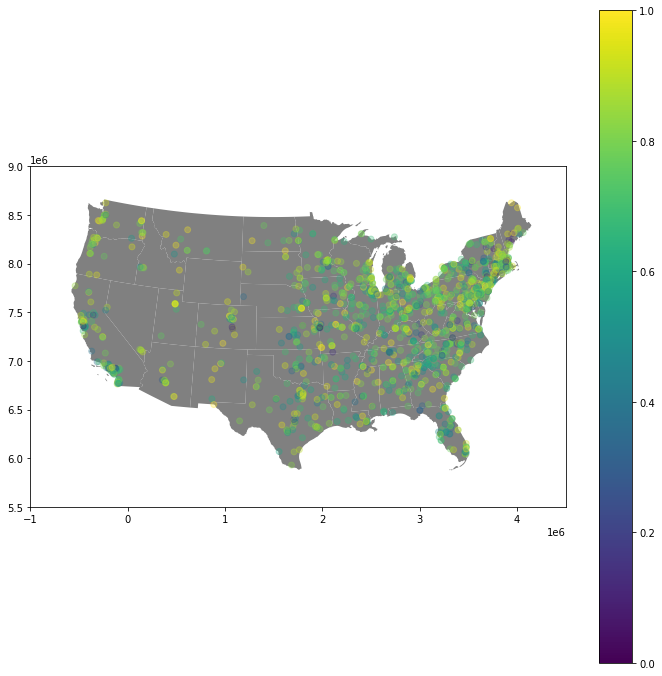

In [31]:
ax = gdf_states.to_crs("EPSG:3082").plot(
    facecolor="gray", figsize=(12,12))
gdf_colleges.to_crs("EPSG:3082").plot(ax=ax, alpha=0.3, column = "Admission Rate", legend=True)
ax.set_xlim(-1e6, 4.5e6)
ax.set_ylim(0.55e7, 0.9e7)

The graph shows each college and their respective locations on a U.S map. It also shows the admission rate based on the color of each dot. There are many colleges on the east coast and west coast, while there were not as many in the center probably because of population differences. Schools with lower admission rates (purple) are scattered around the map with quite a few being on the east coast.

# Dot Plot of Flagship Colleges Locations and Admission Rate

In [32]:
gdf_flagship = gpd.GeoDataFrame(
    df_flagship_combined,
    geometry = gpd.points_from_xy(df_flagship_combined["Longitude"], df_flagship_combined["Latitude"])
).set_crs(gdf_states.crs)
gdf_flagship

,Name,Primarily Undergraduate,Public: Net Cost,Private: Net Cost,In State Tuition,Out of State Tution,Completion Rate,Admission Rate,City,State,...,Net Cost,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 75th percentile score,SAT Math 75th percentile score,SAT Writing 75th percentile score,ACT Composite 75th percentile score,Location,Population,geometry
0,The University of Alabama,3.0,21649.0,0.0,11620.0,31090.0,0.7214,0.8039,Tuscaloosa,AL,...,21649.0,23.0,76.0,620.0,640.0,600.0,30.0,"Tuscaloosa, AL","38,316",POINT (-87.54598 33.21187)
1,University of Arkansas,3.0,16256.0,0.0,9384.0,25872.0,0.6850,0.7767,Fayetteville,AR,...,16256.0,27.0,91.0,600.0,630.0,NaN,28.0,"Fayetteville, AR","29,068",POINT (-94.17698 36.07001)
2,University of Arizona,3.0,13644.0,0.0,12716.0,36743.0,0.6489,0.8513,Tucson,AZ,...,13644.0,66.0,52.0,600.0,630.0,590.0,27.0,"Tucson, AZ","48,274",POINT (-110.95082 32.23267)
3,University of California-Berkeley,3.0,13423.0,0.0,14312.0,44066.0,0.9234,0.1748,Berkeley,CA,...,13423.0,91.0,40.0,720.0,770.0,750.0,33.0,"Berkeley, CA","45,036",POINT (-122.26046 37.87192)
4,University of Colorado Boulder,3.0,18204.0,0.0,12466.0,38284.0,0.7247,0.8420,Boulder,CO,...,18204.0,45.0,75.0,630.0,650.0,NaN,29.0,"Boulder, CO","39,000",POINT (-105.27082 40.00878)
5,University of Connecticut,3.0,20344.0,0.0,17834.0,40502.0,0.8303,0.5609,Storrs,CT,...,20344.0,91.0,27.0,650.0,680.0,NaN,30.0,"Storrs, CT","26,876",POINT (-72.24995 41.80910)
6,University of the District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Washington, DC","3,476",POINT EMPTY
7,University of Delaware,3.0,17260.0,0.0,14660.0,36090.0,0.8249,0.6599,Newark,DE,...,17260.0,99.0,27.0,630.0,650.0,630.0,29.0,"Newark, DE","23,996",POINT (-75.75282 39.67958)
8,University of Florida,3.0,8394.0,0.0,6381.0,28659.0,0.8864,0.3113,Gainesville,FL,...,8394.0,63.0,37.0,670.0,690.0,680.0,31.0,"Gainesville, FL","55,781",POINT (-82.34791 29.64629)
9,University of Georgia,3.0,15037.0,0.0,12080.0,31120.0,0.8718,0.4838,Athens,GA,...,15037.0,86.0,60.0,660.0,670.0,670.0,30.0,"Athens, GA","40,118",POINT (-83.37404 33.95626)


(5600000.0, 8900000.0)

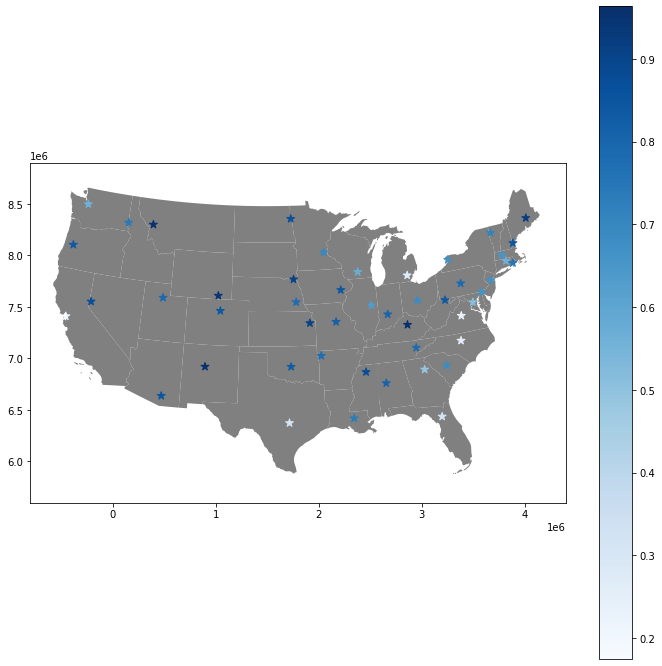

In [33]:
ax = gdf_states.to_crs("EPSG:3082").plot(
    facecolor= "gray", linewidths=0.2, figsize=(12,12))
gdf_flagship.to_crs("EPSG:3082").plot(ax=ax, column = "Admission Rate", marker='*', markersize= 70, legend=True, cmap="Blues")
ax.set_xlim(-0.8e6, 4.4e6)
ax.set_ylim(0.56e7, 0.89e7)

The lighter dots which signify lower admission rates are around the coasts and in more-populated states like Berekely, The University of Texas at Austin, UNC, while the flagship colleges in the middle of the country still have relatively high admission rates like University of Kansas and University of Kentucky. This shows that not all the flagship colleges are competitive to get into, and if you want to go to a well-known competitive college, you may want to travel outside your original state.

# Cloropleth Showing Which States Have More Elite Colleges

I wanted to show which states had the most elite colleges for students who may consider moving to a different state for college but are unsure if there are many competitive schools in the area. 

I defined elite colleges as colleges that had a lower than 30% acceptance rate and had a higher than a 690 75th Percentile SAT score for both Math and Critical Reading. This reduced the number of colleges to only 55 elite colleges.

In [34]:
df_merged["Elite Colleges"] = ((df_merged["Admission Rate"]<0.3) & (df_merged["SAT Math 75th percentile score"]>690) & (df_merged["SAT Critical Reading 75th percentile score"]>690))

In [35]:
df_elite = df_merged[df_merged["Elite Colleges"]]
df_elite

,Name,Primarily Undergraduate,Public: Net Cost,Private: Net Cost,In State Tuition,Out of State Tution,Completion Rate,Admission Rate,City,State,...,Net Cost,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 75th percentile score,SAT Math 75th percentile score,SAT Writing 75th percentile score,ACT Composite 75th percentile score,Accreditor Abbrev,geometry,Elite Colleges
55,California Institute of Technology,3,0.0,9755.0,56862.0,56862.0,0.9156,0.0669,Pasadena,CA,...,9755.0,88.0,43.0,800.0,800.0,790.0,35.0,WASCSCUC,POINT (-118.12588 34.13735),True
71,University of California-Berkeley,3,13423.0,0.0,14312.0,44066.0,0.9234,0.1748,Berkeley,CA,...,13423.0,91.0,40.0,720.0,770.0,750.0,33.0,WASCSCUC,POINT (-122.26046 37.87192),True
85,Claremont McKenna College,3,0.0,15962.0,56475.0,56475.0,0.9228,0.1334,Claremont,CA,...,15962.0,58.0,42.0,740.0,760.0,750.0,33.0,WASCSCUC,POINT (-117.71119 34.10215),True
90,Harvey Mudd College,3,0.0,18077.0,58660.0,58660.0,0.9271,0.1796,Claremont,CA,...,18077.0,89.0,41.0,760.0,800.0,760.0,35.0,WASCSCUC,POINT (-117.70984 34.10652),True
114,Pomona College,3,0.0,9365.0,54774.0,54774.0,0.9399,0.0862,Claremont,CA,...,9365.0,78.0,51.0,760.0,780.0,780.0,34.0,WASCSCUC,POINT (-117.71456 34.09903),True
132,University of Southern California,3,0.0,22826.0,60275.0,60275.0,0.9167,0.1611,Los Angeles,CA,...,22826.0,79.0,41.0,720.0,760.0,750.0,33.0,WASCSCUC,POINT (-118.28417 34.02128),True
142,Colorado College,3,0.0,14593.0,60864.0,60864.0,0.8798,0.1360,Colorado Springs,CO,...,14593.0,49.0,47.0,710.0,720.0,700.0,32.0,HLC,POINT (-104.82270 38.84886),True
173,Wesleyan University,3,0.0,11936.0,59686.0,59686.0,0.9093,0.2090,Middletown,CT,...,11936.0,80.0,41.0,740.0,740.0,750.0,33.0,NECHE,POINT (-72.65715 41.55466),True
175,Yale University,3,0.0,2815.0,57700.0,57700.0,0.9639,0.0653,New Haven,CT,...,2815.0,84.0,35.0,800.0,790.0,800.0,35.0,NECHE,POINT (-72.92669 41.31116),True
184,Georgetown University,3,0.0,12505.0,57928.0,57928.0,0.9422,0.1681,Washington,DC,...,12505.0,87.0,35.0,750.0,750.0,NaN,33.0,MSCHE,POINT (-77.07346 38.90881),True


In [36]:
elite_count = df_elite.groupby("State FIPS")["Name"].count()
elite_count.name = "Elite School Count"
elite_count = pd.DataFrame(elite_count)
elite_count

,Elite School Count
State FIPS,
6,7
8,1
9,2
11,1
13,2
17,2
18,1
19,1
22,1


I merged the Elite School Count and the gdf_state_colleges, so I could create a Chloropleth that needs both of these dataframes.

In [37]:
gdf_states_colleges = gdf_states.merge(
    elite_count,
    left_on="STATEFP", right_on= "State FIPS",
    how = "outer"
)
gdf_states_colleges["Elite School Count"] = gdf_states_colleges["Elite School Count"].fillna(0)
gdf_states_colleges

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Elite School Count
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",1.0
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",1.0
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",0.0
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",0.0
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",4.0
5,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05314 41.11446, -104.05245 41.2...",0.0
6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704...",0.0
7,72,01779808,0400000US72,72,PR,Puerto Rico,00,8868896030,4922382562,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ...",0.0
8,1,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",0.0
9,5,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61792 36.49941, -94.36120 36.499...",0.0


(5600000.0, 8900000.0)

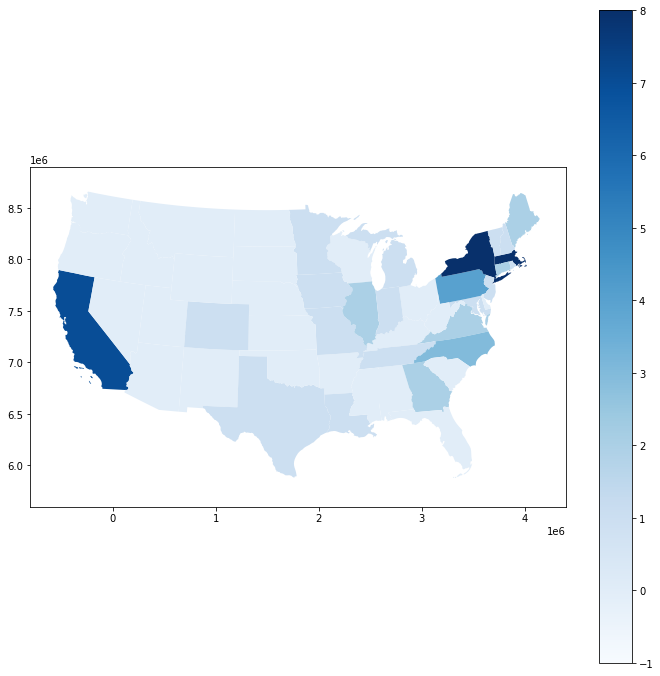

In [38]:
ax = gdf_states_colleges.to_crs("EPSG:3082").plot(column="Elite School Count", legend=True, figsize=(12,12), cmap ="Blues", vmin=-1)
ax.set_xlim(-0.8e6, 4.4e6)
ax.set_ylim(0.56e7, 0.89e7)

On the map, the darker blue states have relatively more elite colleges while lighter blue colleges have no elite colleges. We can see there is a huge chunk of the United States in the top left that have no elite colleges. California and New York both have over 5 elite schools. The east coast in general has most of the elite colleges with the exception of California.

# Using Distance Metrics to Find Comparable Universities


There are so many higher institutions in the United States that many students feel overwhelmed when trying to find schools that they can get into. They may overlook colleges that would accept them if they just applied. By using distance metrics, we are able to find colleges with similar statistics as a college that a potential applicant has already gotten into. This will allow the student to optimize their chances of applying to schools they can get into.

In [39]:
#dataframe of colleges that aren't missing important stats
df_merged_contains_stats = df_merged[(df_merged["SAT Math 75th percentile score"].notna()) & 
                                     (df_merged["Percent of freshmen submitting SAT scores"].notna()) &
                                     (df_merged["Completion Rate"].notna()) &
                                     (df_merged["In State Tuition"].notna())]
df_merged_contains_stats                                  

,Name,Primarily Undergraduate,Public: Net Cost,Private: Net Cost,In State Tuition,Out of State Tution,Completion Rate,Admission Rate,City,State,...,Net Cost,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 75th percentile score,SAT Math 75th percentile score,SAT Writing 75th percentile score,ACT Composite 75th percentile score,Accreditor Abbrev,geometry,Elite Colleges
0,Alabama A & M University,3,17694.0,0.0,10024.0,18634.0,0.2866,0.8965,Normal,AL,...,17694.0,15.0,88.0,450.0,450.0,NaN,19.0,SACSCC,POINT (-86.56850 34.78337),False
1,University of Alabama at Birmingham,3,17857.0,0.0,8568.0,20400.0,0.6117,0.8060,Birmingham,AL,...,17857.0,6.0,93.0,640.0,650.0,NaN,28.0,SACSCC,POINT (-86.79935 33.50570),False
2,University of Alabama in Huntsville,3,17054.0,0.0,11338.0,23734.0,0.5714,0.7711,Huntsville,AL,...,17054.0,34.0,94.0,640.0,650.0,NaN,29.0,SACSCC,POINT (-86.64045 34.72456),False
3,Alabama State University,3,19853.0,0.0,11068.0,19396.0,0.3177,0.9888,Montgomery,AL,...,19853.0,18.0,87.0,480.0,480.0,NaN,19.0,SACSCC,POINT (-86.29568 32.36432),False
4,The University of Alabama,3,21649.0,0.0,11620.0,31090.0,0.7214,0.8039,Tuscaloosa,AL,...,21649.0,23.0,76.0,620.0,640.0,600.0,30.0,SACSCC,POINT (-87.54598 33.21187),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,Florida Gulf Coast University,3,11133.0,0.0,6118.0,25162.0,0.5274,0.7749,Fort Myers,FL,...,11133.0,83.0,67.0,550.0,550.0,540.0,24.0,SACSCC,POINT (-81.77260 26.46364),False
1550,California State University-Channel Islands,3,16151.0,0.0,6802.0,18682.0,0.5544,0.7943,Camarillo,CA,...,16151.0,90.0,24.0,530.0,530.0,NaN,23.0,WASCSCUC,POINT (-119.04356 34.16295),False
1559,Ave Maria University,3,0.0,16140.0,23188.0,23188.0,0.5263,0.9179,Ave Maria,FL,...,16140.0,69.0,64.0,620.0,590.0,600.0,26.0,SACSCC,POINT (-81.43895 26.33598),False
1642,Kennesaw State University,3,19365.0,0.0,6436.0,17690.0,0.4686,0.8311,Kennesaw,GA,...,19365.0,67.0,45.0,590.0,580.0,570.0,24.0,SACSCC,POINT (-84.58305 34.03881),False


In [40]:
df_features = df_merged_contains_stats[["SAT Math 75th percentile score", "Percent of freshmen submitting SAT scores", "Completion Rate", "In State Tuition"]]
scaler = StandardScaler()
scaler.fit(df_features)
df_features_st = scaler.transform(df_features)
df_features_st

array([[-1.95523394, -1.24290869, -1.867154  , -1.06742171],
       [ 0.78546553, -1.51620289,  0.05183093, -1.15707639],
       [ 0.78546553, -0.66595426, -0.18605001, -0.98651082],
       ...,
       [-0.03674431,  0.39685652, -0.45226416, -0.25683499],
       [-0.17377928,  0.33612447, -0.79285299, -1.28835647],
       [-0.5848842 ,  1.30783719, -0.15653625, -0.46717868]])

In [41]:
#using example college #3 to find similar colleges
from sklearn.metrics import pairwise_distances
x = df_features_st[[3],:]
x1 = df_features_st
dist = pairwise_distances(x,x1)
dist

array([[0.46383049, 2.93174615, 2.81174942, ..., 2.59685945, 2.22857611,
        3.09663144]])

In [42]:
inds = dist[0].argsort()[0:4]
df_merged_contains_stats.iloc[inds]

,Name,Primarily Undergraduate,Public: Net Cost,Private: Net Cost,In State Tuition,Out of State Tution,Completion Rate,Admission Rate,City,State,...,Net Cost,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 75th percentile score,SAT Math 75th percentile score,SAT Writing 75th percentile score,ACT Composite 75th percentile score,Accreditor Abbrev,geometry,Elite Colleges
3,Alabama State University,3,19853.0,0.0,11068.0,19396.0,0.3177,0.9888,Montgomery,AL,...,19853.0,18.0,87.0,480.0,480.0,NaN,19.0,SACSCC,POINT (-86.29568 32.36432),False
1442,West Virginia State University,3,17902.0,0.0,8437.0,14125.0,0.3010,0.8850,Institute,WV,...,17902.0,9.0,83.0,495.0,480.0,470.0,22.0,HLC,POINT (-81.76503 38.38054),False
0,Alabama A & M University,3,17694.0,0.0,10024.0,18634.0,0.2866,0.8965,Normal,AL,...,17694.0,15.0,88.0,450.0,450.0,NaN,19.0,SACSCC,POINT (-86.56850 34.78337),False
990,Dickinson State University,3,13283.0,0.0,8122.0,9942.0,0.3626,0.9862,Dickinson,ND,...,13283.0,14.0,77.0,533.0,505.0,475.0,23.0,HLC,POINT (-102.79968 46.88292),False


The Top Three Schools that are most similar to Alabama State University are West Virginia State University, Alabama A&M University, and Dickinson State University. You can replace the 3 with the index of the college you want to find comparable colleges to and it will return the top 3 most similar colleges to that respective college.